In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
candidates = {'gmat': 
[780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
 'gpa': 
[4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,
3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
 'work_experience': 
[3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
 'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
 }
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [5]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [7]:
print(y_test)


22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
18    0
29    1
Name: admitted, dtype: int64


In [8]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


In [9]:
print(y_pred) #predicted values

[0 0 1 1 0 0 1 1 0 1]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

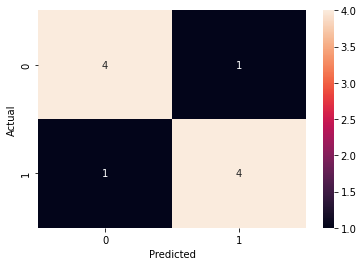

In [10]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [11]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
22,0,0
20,1,0
25,1,1
4,0,1
10,0,0
15,0,0
28,1,1
11,1,1
18,0,0
29,1,1


In [19]:
def Check(df):
    if df['Actual']== df['Predicted']:
        return "True"
    else:
        return "False" 


df['Matching'] = df.apply(Check, axis=1)
df

,Actual,Predicted,Matching
22,0,0,True
20,1,0,False
25,1,1,True
4,0,1,False
10,0,0,True
15,0,0,True
28,1,1,True
11,1,1,True
18,0,0,True
29,1,1,True


In [20]:
new_candidates = {'gmat': [580,740,680,610,710],
        'gpa': [4.0,3.7,3.3,2.3,3],
 'work_experience': [3,4,6,1,5]
 }
df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

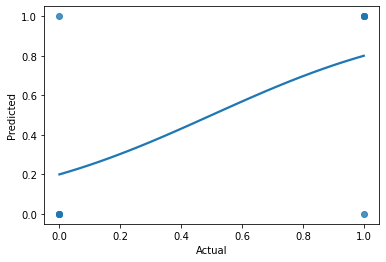

In [17]:
x = df["Actual"]
y = df["Predicted"]
sn.regplot(x,y,logistic=True,ci=None)
